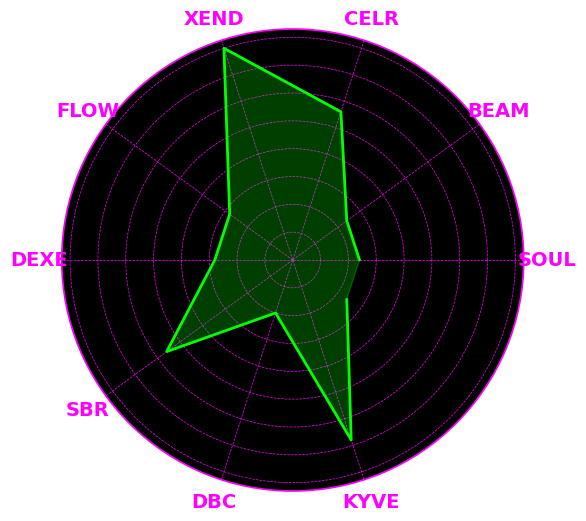

<ipython-input-6-98c405a27fff>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Ativo', y='Total', data=resultados_ordenados, palette=['#00FFFF', '#FF00FF', '#00FF00', '#FFAA00', '#AA00FF', '#00AAFF', '#FF5500', '#55FF00', '#AAFF55'])


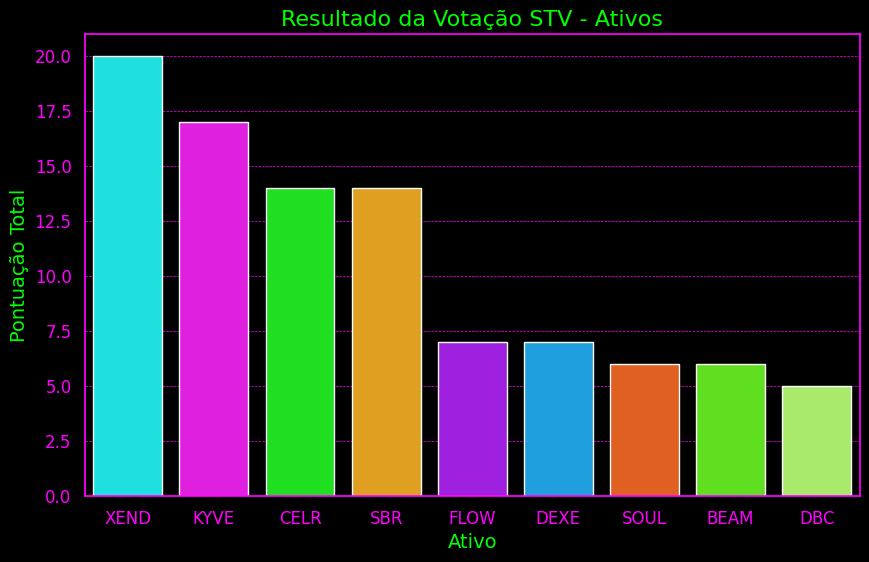

Ativo vencedor por voto preferencial: XEND


In [6]:
import pandas as pd
import gspread
from google.auth import default
from google.colab import auth
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Autenticação no Google Colab
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Abrir a planilha (substitua pela sua URL)
planilha = gc.open_by_url('https://docs.google.com/spreadsheets/d/1GwjKAuE2RuCsNqjmfSZ5aOTmHYLRjlCwHlE0FeVcpRI/edit?resourcekey=&gid=1314903386#gid=1314903386')

# Seleciona a aba "Form Responses 1"
aba = planilha.worksheet('Form Responses 1')

# Converte os dados em um DataFrame do pandas
df = pd.DataFrame(aba.get_all_records())

# Lista de ativos
ativos = ['SOUL', 'BEAM', 'CELR', 'XEND', 'FLOW', 'DEXE', 'SBR', 'DBC', 'KYVE']

# Criando um DataFrame para armazenar os resultados
resultados = pd.DataFrame({'Ativo': ativos, 'Total': 4})

# Calculando os totais ponderados com base nas respostas
for ativo in ativos:
    for choice in ['Choice 1', 'Choice 2', 'Choice 3']:
        pontuacao = 4 - int(choice.split()[-1])  # Atribuímos 3 para 'Choice 1', 2 para 'Choice 2', e 1 para 'Choice 3'
        resultados.loc[resultados['Ativo'] == ativo, 'Total'] += (
            (df[f'Rank the 3 assets that appear to be the best choices for short or very short-term investments. [{ativo}]'] == choice).sum() * pontuacao
        )

# Encontrando o ativo vencedor com a maior pontuação
vencedor = resultados.loc[resultados['Total'].idxmax(), 'Ativo']

# Função para plotar gráfico radar com estilo neon
def plot_radar(resultados):
    # Estilo neon
    labels = list(resultados.keys())
    stats = list(resultados.values())

    # Adiciona o primeiro valor no final para fechar o gráfico
    stats += stats[:1]
    labels += labels[:1]

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    stats, angles = np.array(stats), np.array(angles)

    # Organizar o gráfico para ser circular
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Definindo cores neon
    ax.set_facecolor('black')
    ax.fill(angles, stats, color='#00FF00', alpha=0.25)
    ax.plot(angles, stats, color='#00FF00', linewidth=2)

    # Ajustes visuais
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels[:-1], color='#FF00FF', fontsize=12, fontweight='bold')

    for label in ax.get_xticklabels():
        label.set_fontsize(14)

    # Estilo para as grades
    ax.spines['polar'].set_color('#FF00FF')
    ax.grid(color='#FF00FF', linestyle='--', linewidth=0.5)
    plt.show()

# Função para plotar gráfico de barras com estilo neon
def plot_bar(resultados):
    # Organizando o DataFrame do mais votado para o menos votado
    resultados_ordenados = resultados.sort_values(by='Total', ascending=False)

    # Definindo o estilo de fundo e cores neon
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")

    ax = sns.barplot(x='Ativo', y='Total', data=resultados_ordenados, palette=['#00FFFF', '#FF00FF', '#00FF00', '#FFAA00', '#AA00FF', '#00AAFF', '#FF5500', '#55FF00', '#AAFF55'])

    # Configuração de fundo preto e labels neon
    ax.set_facecolor('black')
    plt.gcf().set_facecolor('black')
    ax.set_xlabel('Ativo', fontsize=14, color='#00FF00')
    ax.set_ylabel('Pontuação Total', fontsize=14, color='#00FF00')
    ax.set_title('Resultado da Votação STV - Ativos', fontsize=16, color='#00FF00')

    # Estilo neon para os ticks
    ax.tick_params(axis='x', colors='#FF00FF', labelsize=12)
    ax.tick_params(axis='y', colors='#FF00FF', labelsize=12)

    # Estilo neon para as bordas
    ax.spines['top'].set_color('#FF00FF')
    ax.spines['bottom'].set_color('#FF00FF')
    ax.spines['left'].set_color('#FF00FF')
    ax.spines['right'].set_color('#FF00FF')

    # Grade neon
    ax.grid(True, which='major', axis='y', color='#FF00FF', linestyle='--', linewidth=0.5)

    plt.show()

# Plotando os gráficos
plot_radar(resultados.set_index('Ativo')['Total'].to_dict())
plot_bar(resultados)

# Exibindo o vencedor
print(f"Ativo vencedor por voto preferencial: {vencedor}")